In [1]:
from IPython.display import Image

#### 利用sklearn构建感知机分类器.

In [2]:
# 从sklearn中读取iris数据集.
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# np.unique(y) 的目的是找出 y 中所有不同的分类标签，并将它们打印出来.
#  Iris-setosa, Iris-versicolor, and Iris-virginica.
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
# 训练集和测试集划分.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(105, 2) (45, 2)
(105,) (45,)


通过设置stratify=y, 在这种情况下，分层意味着 train_test_split 方法返回具有与输入数据集相同类标签比例的训练和测试子集.

In [4]:
# 使用 np.bincount(y_train) 的目的是统计每个分类标签在数据集中出现的次数.
print('Labels count in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
"""
    如Chapter2中提到的那样，Gradient Descent等算法对特征尺度敏感，因此
    这里首先进行特征标准化处理。
"""
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

# 标准化变换.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train.mean(), X_train.std())
print(X_train_std.mean(), X_train_std.std())

2.4933333333333327 1.891674323458387
1.0150610510858574e-16 0.9999999999999999


In [6]:
# 利用sklearn构建一个感知器分类模型.
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [7]:
y_pred = ppn.predict(X_test_std)
print('错误分类的样本数量: %d' %(y_test != y_pred).sum())

错误分类的样本数量: 1


In [8]:
# 使用sklearn.metrics中提供的模型评估指标.
from sklearn.metrics import accuracy_score

print("The trained model's Accuracy: %.3f" % accuracy_score(y_test, y_pred))

The trained model's Accuracy: 0.978


In [9]:
"""
scikit-learn 中的每个分类器都有一个 score 方法，
该方法通过将 predict 调用与 accuracy_score 相结合来计算分类器的预测准确率.
"""
print("The trained model's Accuracy: %.3f" % ppn.score(X_test_std, y_test))

The trained model's Accuracy: 0.978


In [10]:
# 预测结果可视化--绘制决策边界(plot_decision_regions).
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 设置Marker生成器和color map.
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 绘制决策曲面.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 绘制类别样本.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # 对测试集样本高亮显示.
    if test_idx:
        # 绘制所有样本.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

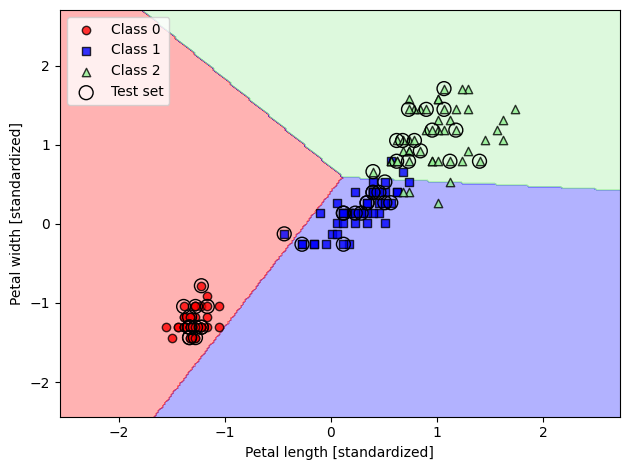

In [11]:
# 调用上述函数.
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_01.png', 
            dpi=600)
plt.show()

从结果图中我们可以看出，三种花卉类别无法通过线性决策边界完美地分开。

#### 通过逻辑回归建模类别概率

感知器最大的缺点是，如果类别不是完全线性可分的，它就永远不会收敛。上一节中的分类任务就是这种情况的一个例子。

逻辑回归是一种非常容易实现的分类模型，在线性可分类别上表现非常好。它是工业界最广泛使用的分类算法之一。 与感知器和 Adaline 类似，本章中的逻辑回归模型也是二分类的线性模型。

##### 几率odds

为了解释逻辑回归背后的主要机制，这里首先了解一下几率(odds)--有利于特定事件发生的可能性，其记录为$\frac{p}{(1-p)}$, 其中$p$代表positive event事件发生的概率。

其中，"positive event"并不一定意味着"好", 而是我们想要预测的事件。比如，给定某些症状，换着患有某种疾病的概率。为简便起见，将概率$p$定义为:
$$p:=p(y=1|x)$$
即，给定特征$x$, 特定样本属于类别1的条件概率(conditional probability)。

进一步可以定义logit function, 它是几率的对数：
$$\mathrm{logit}(p)=\mathrm{log}\frac p{(1-p)}$$

在Logistic model中，假设加权输入(在Chapter2中被称为净输入net input)与对数几率之间存在线性关系：
$$\mathrm{logit}(p)=w_1x_1+\cdots+w_mx_m+b=\sum_{i=j}w_jx_j+b=\boldsymbol{w}^T\boldsymbol{x}+b$$

在上述内容中，讨论了对数几率和净输入之间的线性关系这一假设。但在实际生产活动中，我们关注的是具体的概率$p$。因此怎样根据输入的加权组合得到具体的概率值？

这时候，可以考虑概函数的逆函数(inverse function), 从而实现将实数范围映射到$[0,1]$。该Logit function的逆函数通常被称为Logistic sigmoid function, 有时候也简称为sigmoid function：


$$
\sigma(z)=\frac1{1+e^{-z}}
$$

在上式中，$z$是净输入，并记录为$\boldsymbol{w}^T\boldsymbol{x}+b$。

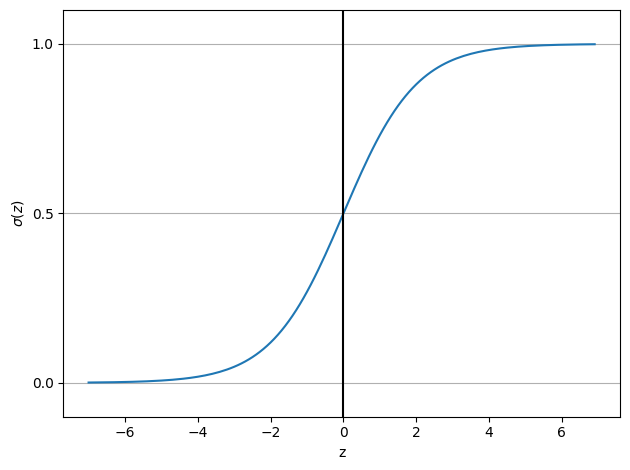

In [12]:
# S型函数绘制.
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_02.png', dpi=600)
plt.show()

#### 逻辑回归与自适应线性神经元的对比

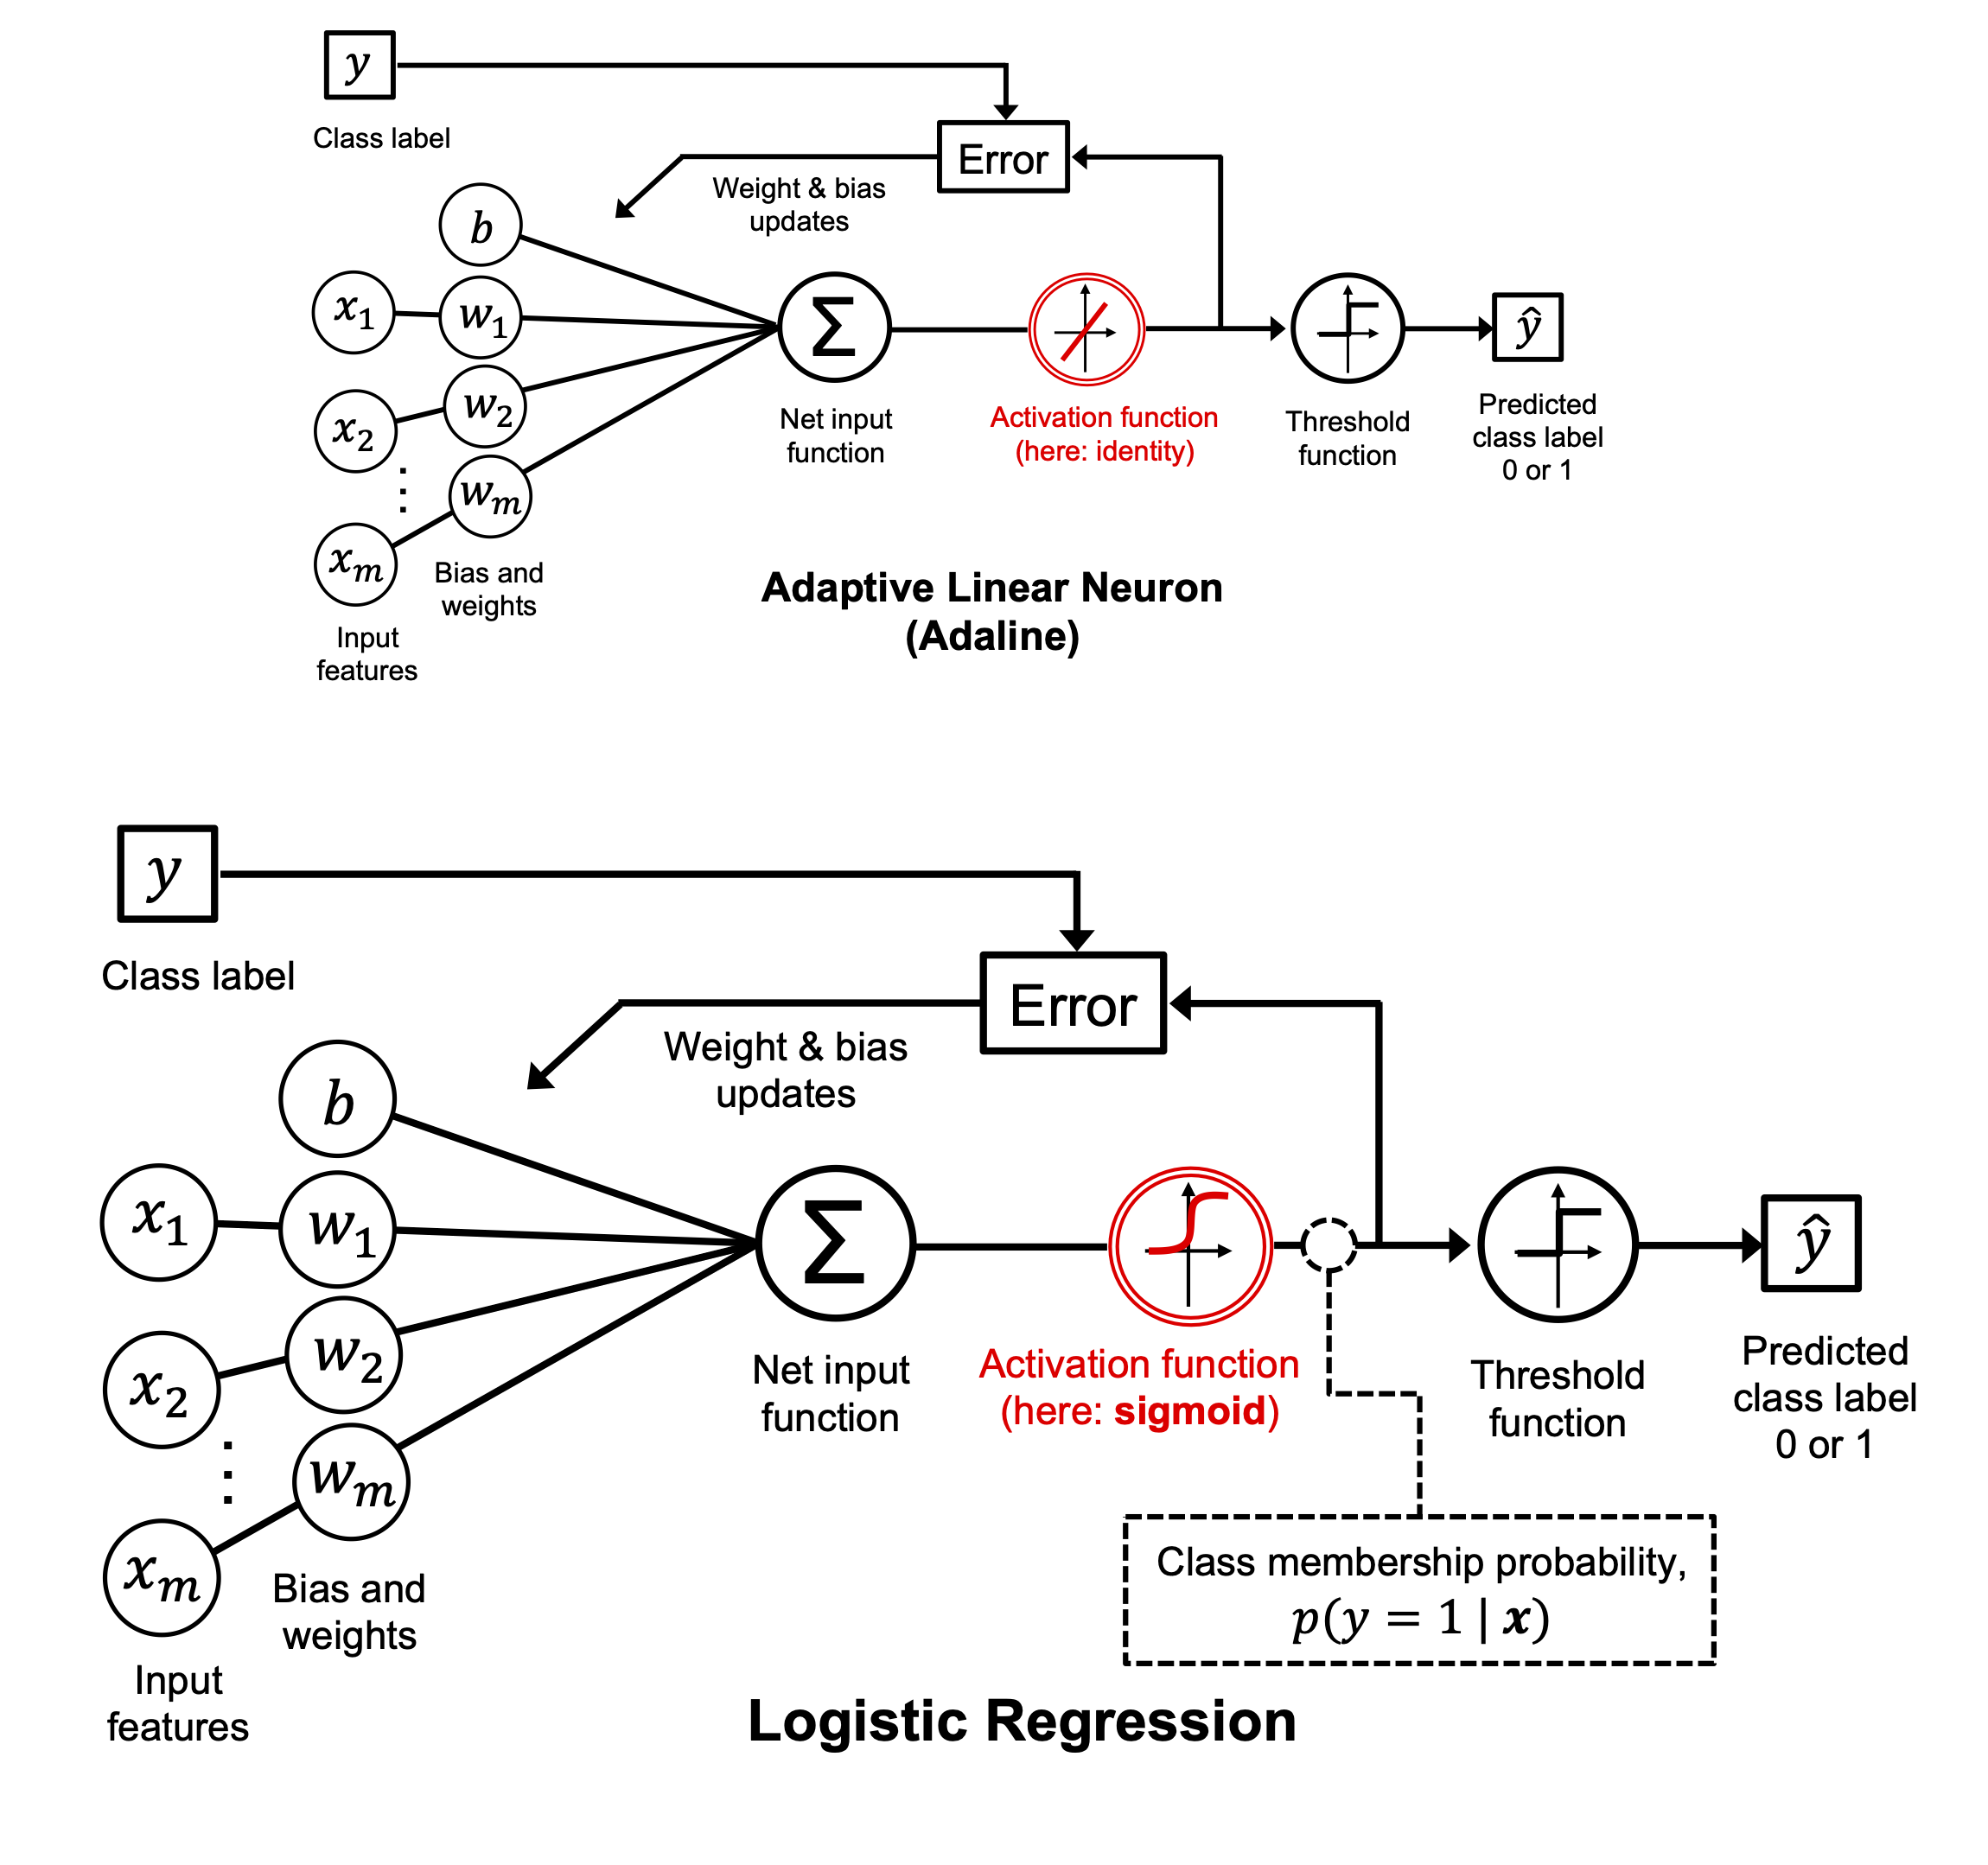

In [13]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter3/figures/03_03.png', 
      width=450)

从上图可以看出，Adaline neuron和逻辑回归之间的区别在于激活函数。前者使用的是恒等函数, 后者使用的是S型函数。

如图，S型函数的输出可以被解释为在给定特征$x$，以及参数$w和b$时， 特定样本属于类别1的概率$\sigma(z)=p(y=1|\boldsymbol{x};\boldsymbol{w},b)$。

然后可以通过阈值函数，将预测概率转换为二元结果：
$$\hat{y}=\left\{\begin{matrix}1&\text{if} \quad\sigma(z)\geq0.5\\0&\text{otherwise}\end{matrix}\right.$$

#### 通过Logistic loss function学习模型权重

首先定义在构建逻辑回归模型时候想要最大化的似然函数$\mathcal{L}$，同时假设数据集中的各个样本相互独立，于是有：

$$\mathcal{L}(\mathbf{w},b|\mathbf{x})=p(y|\mathbf{x};\mathbf{w},b)=\prod_{i=1}^np\big(y^{(i)}\big|\mathbf{x}^{(i)};\mathbf{w},b\big)=\prod_{i=1}^n\big(\sigma\big(z^{(i)}\big)\big)^{y^{(i)}}\big(1-\sigma\big(z^{(i)}\big)\big)^{1-y^{(i)}}$$


**解释--part1:**

这个公式是逻辑回归（Logistic Regression）中的似然函数（Likelihood Function）的表达式，用于模型参数 $w$ 和 $b$ 的估计。逻辑回归是一种广泛使用的二分类模型，其中 $\sigma$ 函数是 Sigmoid 函数，它将输入值映射到 (0, 1) 区间，常用于将线性回归模型的输出转换为概率值。

公式中的各个部分含义如下：

1. $\mathcal{L}(w, b\mid x)$：这是给定参数 $w$ 和 $b$ 以及输入数据 $x$ 时的似然函数，表示模型参数的似然度。

2. $p(y\mid x; w, b)$：这是在给定输入 $x$、权重 $w$ 和偏置 $b$ 的条件下，输出 $y$ 的条件概率。

3. $\prod_{i=1}^{n}$：这是连乘符号，表示对所有样本 $i$ 从 1 到 $n$ 的概率进行乘积。

4. $p\left(y^{(i)}\mid x^{(i)}; w, b\right)$：这是单个样本 $i$ 的条件概率，表示在给定输入 $x^{(i)}$ 和参数$w, b$ 的情况下，输出 $y^{(i)}$ 的概率。

5. $\sigma\left(z^{(i)}\right)$：这是 Sigmoid 函数，定义为 $\sigma(z) = \frac{1}{1 + e^{-z}}$，其中 $z^{(i)} = w^T x^{(i)} + b$ 是输入 $x^{(i)}$ 与权重 $w$ 的点积加上偏置 $b$。

6. $\left(\sigma\left(z^{(i)}\right)\right)^{y^{(i)}}\left(1-\sigma\left(z^{(i)}\right)\right)^{1-y^{(i)}}$：这是单个样本的伯努利概率公式，用于计算给定 $z^{(i)}$ 时，观察到 $y^{(i)}$ 的概率。如果 $y^{(i)} = 1$，则表示正类的概率；如果 $y^{(i)} = 0$，则表示负类的概率。

整个公式的目的是最大化似然函数，即找到一组参数 $w$ 和 $b$，使得观测到的数据 $x$ 和对应的标签 $y$ 的联合概率最大。在实际应用中，通常通过最大化似然函数的对数（对数似然函数）来简化计算，因为对数函数是单调递增的，并且可以将乘积转换为求和，从而更容易进行优化。


**解释--part2:**

伯努利概率公式是描述伯努利分布的公式，伯努利分布是一种离散概率分布，适用于描述只有两种可能结果的随机试验，通常称为“成功”和“失败”。在逻辑回归中，伯努利分布用来表示单个二分类事件的概率。

伯努利概率公式可以表示为：

$$P(Y=y) = \pi^y (1 - \pi)^{1-y}$$

其中：
- $P(Y=y)$是随机变量 $Y$ 取值 $y$ 的概率。
- $\pi$ 是单次试验中“成功”的概率，通常记为 $\pi$或 $p$。
- $y$ 是试验结果，对于二分类问题，$y$ 可以是 0（失败）或 1（成功）。
- $1 - \pi $ 是“失败”的概率。

在逻辑回归中，Sigmoid 函数 $\sigma(z)$ 被用来估计 $\pi$，即给定输入 $x$和参数 $w、b$ 时，输出为 1 的概率。Sigmoid 函数的表达式为：

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

其中 $z$ 通常是输入特征和权重的线性组合，即 $z = w^T x + b$。

因此，在逻辑回归的上下文中，伯努利概率公式可以写为：

$$P(y^{(i)} \mid x^{(i)}; w, b) = \sigma(z^{(i)})^{y^{(i)}} (1 - \sigma(z^{(i)}))^{1 - y^{(i)}}$$

这里：
- $P(y^{(i)} \mid x^{(i)}; w, b)$ 是给定输入$x^{(i)}$ 和参数 $w, b$时，输出 $y^{(i)}$ 的条件概率。
- $\sigma(z^{(i)})$是 Sigmoid 函数的输出，表示给定$x^{(i)}$ 时，输出为 1 的概率。
- $y^{(i)}$是第 $i$ 个样本的实际标签（0 或 1）。

这个公式在逻辑回归模型中用于计算给定参数和输入数据时，模型输出与实际标签一致的概率，这是通过最大化似然函数来估计模型参数的基础。


**解释--part3:**

在逻辑回归中，我们通常处理的是多个独立同分布的样本，每个样本都有一个二元输出（0或1）。当我们想要计算整个数据集的联合概率时，由于这些样本是独立的，我们可以将每个样本的条件概率相乘，得到整个数据集的联合概率。

第二项 $p(y\mid x; w, b)$ 表示在给定参数 $w$和 $b$ 以及输入 $x$ 的条件下，输出 $y$ 的条件概率。对于单个样本，这个概率可以表示为：

$$p(y^{(i)}\mid x^{(i)}; w, b) = \sigma(z^{(i)})^{y^{(i)}}(1 - \sigma(z^{(i)}))^{1 - y^{(i)}}$$

其中 $z^{(i)} = w^T x^{(i)} + b$ 是第 $i$ 个样本的线性组合。

当我们有 $n$ 个这样的独立样本时，整个数据集的联合概率是每个样本概率的乘积，即：

$$\prod_{i=1}^{n} p(y^{(i)}\mid x^{(i)}; w, b)$$

这个连乘形式的原因是，每个样本的概率是独立的，因此整个数据集的概率是每个样本概率的联合。这个连乘形式是概率论中的一个基本原则，即如果事件 $A$ 和事件 $B$ 是独立的，那么 $P(A \cap B) = P(A) \cdot P(B)$。

在逻辑回归中，我们通常通过最大化这个联合概率的对数（称为对数似然函数）来估计模型参数 $w$ 和 $b$，因为对数转换可以将乘积转换为求和，这在数学上和计算上都更加方便：

$$\ln(\mathcal{L}(w, b\mid x)) = \sum_{i=1}^{n} \left[ y^{(i)} \ln(\sigma(z^{(i)})) + (1 - y^{(i)}) \ln(1 - \sigma(z^{(i)})) \right]$$

这个对数似然函数是优化算法（如梯度下降）的目标函数，用于找到最佳的参数 $w$和 $b$，使得模型能够最好地拟合给定的数据集。

在实践中，最大化上述方程的对数更加容易，对应的被称之为对数似然函数(Log-likehood function):
$$l(\mathbf{w},b|\mathbf{x})=\log\mathcal{L}(\mathbf{w},b|\mathbf{x})=\sum_{i=1}[y^{(i)}\log\bigl(\sigma\bigl(z^{(i)}\bigr)\bigr)+\bigl(1-y^{(i)}\bigr)\log\bigl(1-\sigma\bigl(z^{(i)}\bigr)\bigr)]$$

其原因在于：使用对数函数可以降低数值下溢的可能性，如果可能性(likelihoods)非常小，则可能发生数值下溢。其次，通过对数运算，可以实现乘到加的转换，以方便后续的导数运算。

#### 使用梯度下降算法最大化似然函数

此时, 上式改写为如下形式：
$$L(\mathbf{w},b)=\sum_{i=1}^n[-y^{(i)}\log\bigl(\sigma\bigl(z^{(i)}\bigr)\bigr)-\bigl(1-y^{(i)}\bigr)\log\bigl(1-\sigma\bigl(z^{(i)}\bigr)\bigr)]$$

如下是针对单个训练样本的损失计算：
$$L(\sigma(z) ,y;\mathbf{w},b)=-y\log(\sigma(z))-(1-y)\log(1-\sigma(z))$$

所以，根据上式可得：如果$y==0$, 则第一项为0；如果$y==1$,则第二项为0。于是有：
$$L(\sigma(z),y;\mathbf{w},b)=\left\{\begin{matrix}-\log(\sigma(z))&\text{if}\quad y=1\\-\log(1-\sigma(z))&\text{if}\quad y=0\end{matrix}\right.$$

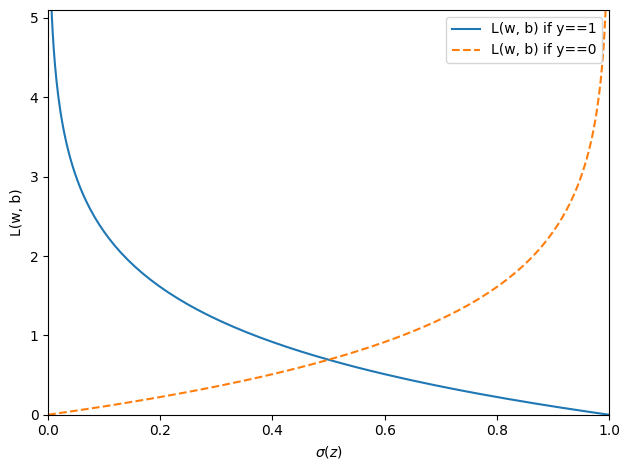

In [14]:
# 不同$\sigma(z)对单个训练示例进行分类的损失.
def loss_1(z):
    return - np.log(sigmoid(z))

def loss_0(z):
    return - np.log(1 - sigmoid(z))

# 指定z的取值范围.
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y==1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y==0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_04.png', dpi=600)
plt.show()

#### 将Adaline实现转化为逻辑回归算法

In [15]:
# 替换损失函数
# 更改激活函数
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # np.clip 是 NumPy 库中的一个函数，用于限制数组中的数值在指定的最小值和最大值之间。超出这个范围的值会被"剪切"到边界值.
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

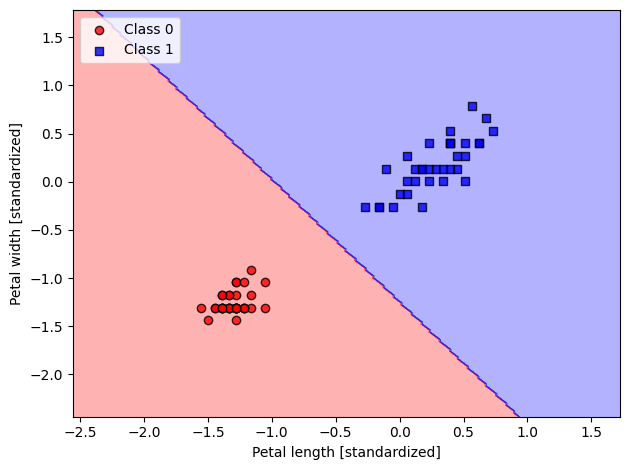

In [16]:
# 这里仅考虑类别0和1.
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_05.png', dpi=600)
plt.show()

#### 使用sklearn训练逻辑回归

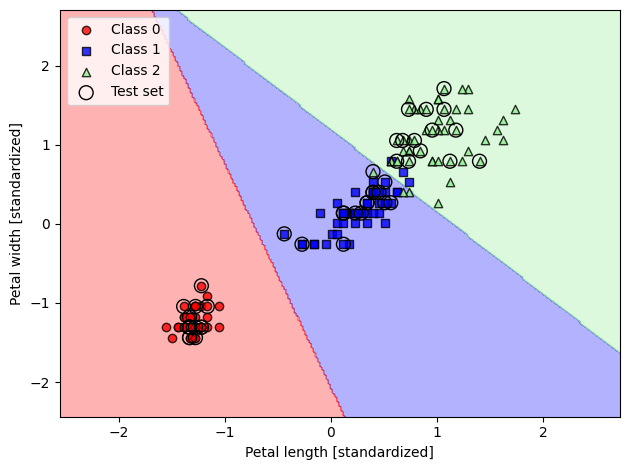

In [17]:
# 在sklearn中，可以通过多项式或者OVR方法来实现多分类.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=lr, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_06.png', dpi=600)
plt.show()

In [18]:
# 在上述代码基础上，可以预测得到特定样本属于某个类别的概率.
lr.predict_proba(X_test_std[:3, :])
# print(lr.predict_proba(X_test_std[:3, :]).sum(axis=1))

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [19]:
# 以第一行为例，最大值为0.85，意思是属于'Iris-virginica'的概率为85%.
print(lr.predict_proba(X_test_std[:3, :]).argmax(axis=1))

[2 0 0]


In [20]:
# 在上面示例中，通过np.argmax转换得到类别标签，另外可以通过predict方法获得.
print(lr.predict(X_test_std[:3, :]))

[2 0 0]


In [21]:
# 获得单行样本预测结果.
# sklearn需要二维数组的输入.
print(lr.predict(X_test_std[0, :].reshape(1, -1)))

[2]


#### 通过正则化来解决过拟合

过拟合问题很常见，即模型在训练数据上表现良好，但不能很好地推广到未知数据上(测试数据)。如果一个模型存在过拟合问题，也称该模型具有高方差，其原因可能是因为参数太多导致。同时，模型也可能存在欠拟合问题，这意味着模型复杂度太低，无法很好地捕捉数据模式。
如下图所示，通过将线性决策边界与非线性决策边界进行比较，可以较好地说明过拟合和欠拟合问题：

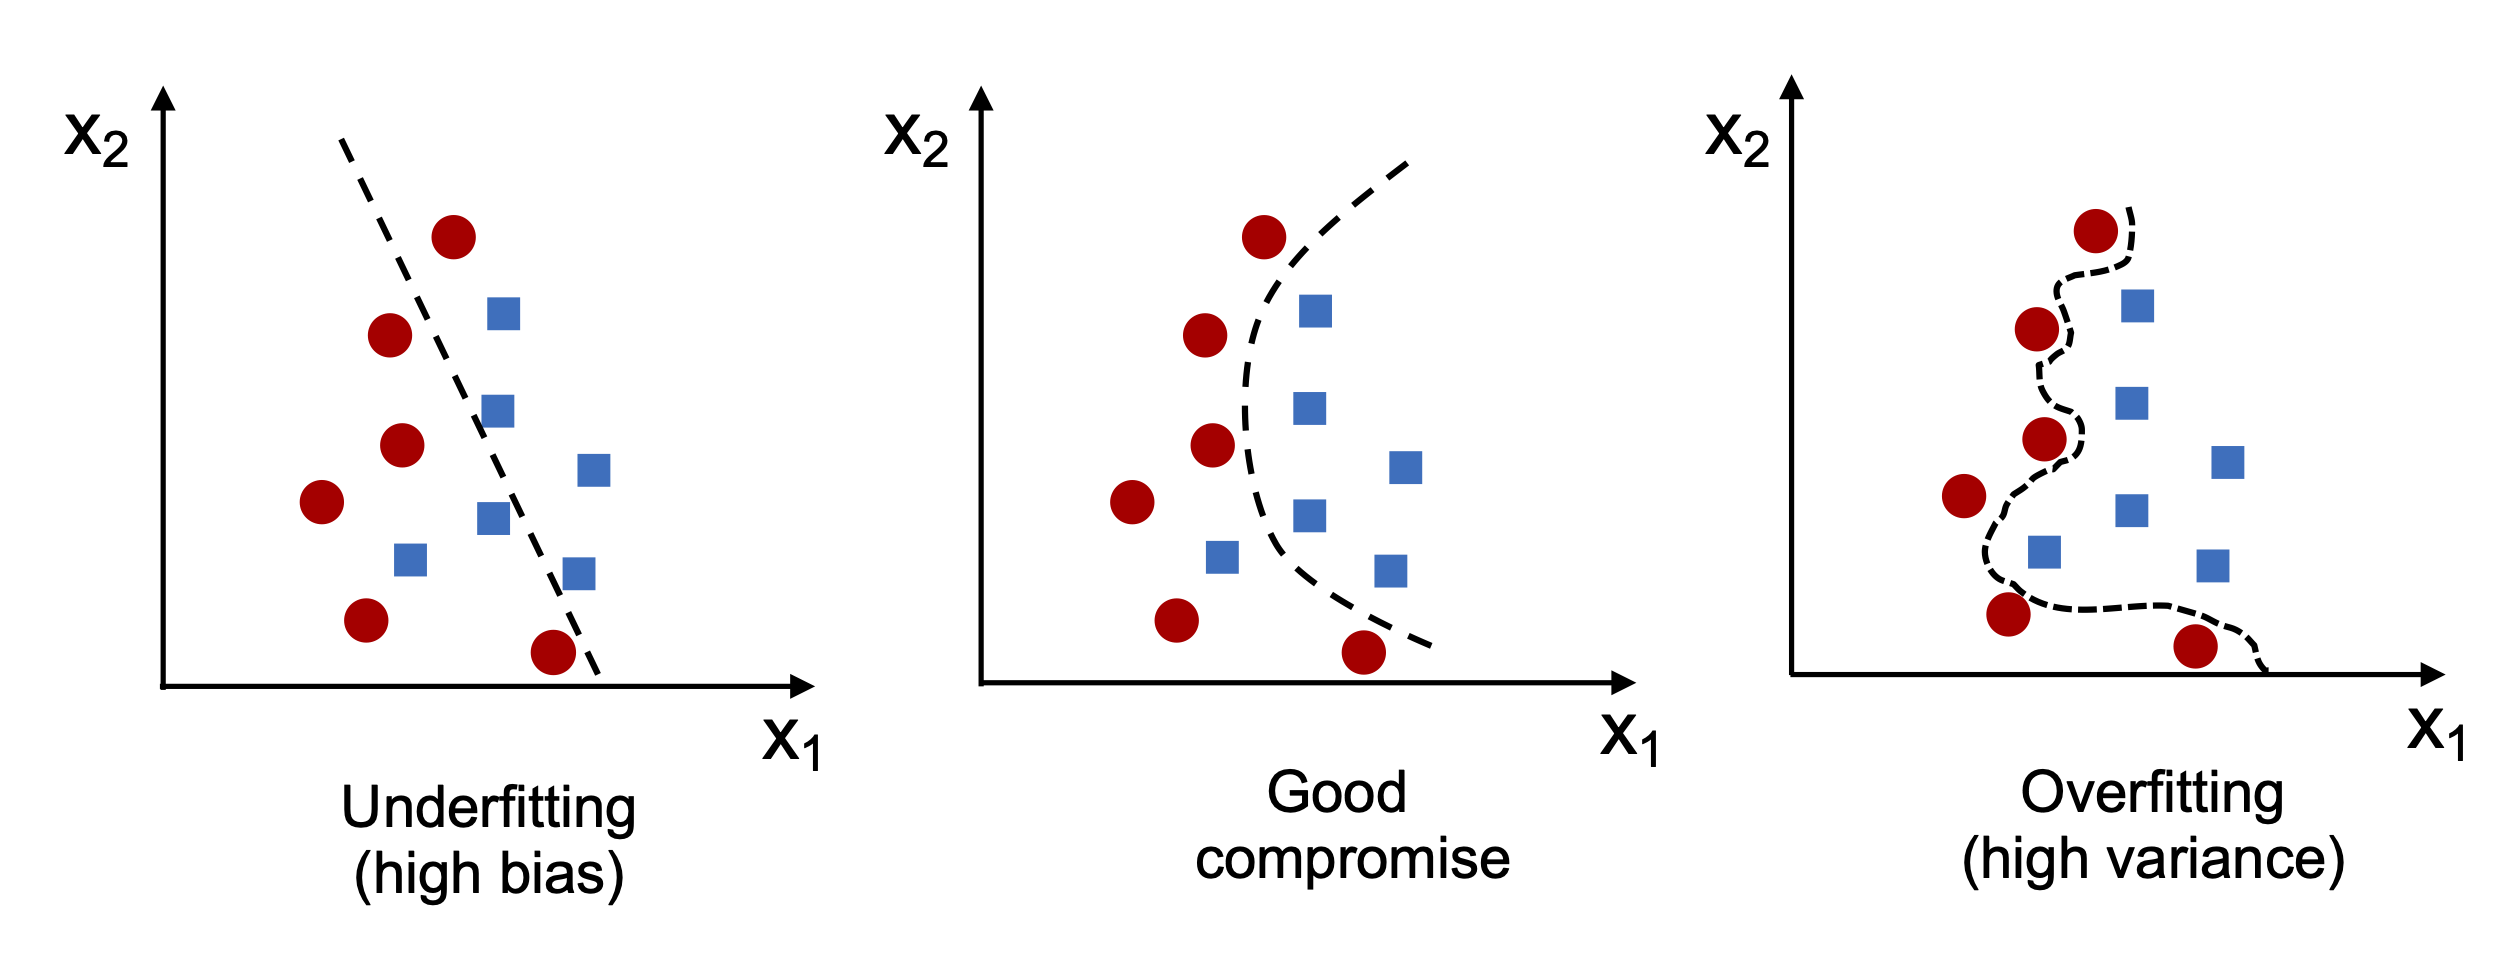

In [22]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter3/figures/03_07.png', 
      width=450)

在实现方差-偏差权衡过程中，正则化(Regularization)是一种非常有效的方法。其可以`处理共线性，即特征之间的高相关性、从数据中过滤噪声并最终防止过拟合`。正则化的原理是对权重进行惩罚，常见的是L2正则，形式如下：

$$\frac{\lambda}{2n}\|\mathbf{w}\|^2=\frac{\lambda}{2n}\sum_{j=1}^mw_j^2$$

其中，$\lambda$被称为**正则项参数(Regularization parameter)**。`正则化也是进行特征标准化的一个重要原因，需要确保所有特征都处在可比较的尺度上`。

对于逻辑回归的损失函数，加上正则项之后得到如下形式：
$$L(\mathbf{w},b)=\frac{1}{n}\sum_{i=1}^{n}[-y^{(i)}\log\bigl(\sigma\bigl(z^{(i)}\bigr)\bigr)-\bigl(1-y^{(i)}\bigr)\log\bigl(1-\sigma\bigl(z^{(i)}\bigr)\bigr)]+\frac{\lambda}{2n}\|\mathbf{w}\|^{2}$$

其中，未正则化处理时，偏导数如下：
$$\frac{\partial L(\boldsymbol{\mathbf{w}},b)}{\partial w_j}=\left(\frac{1}{n}\sum_{i=1}^{n}\bigl(\sigma\bigl(\boldsymbol{\mathbf{w}}^{T}\boldsymbol{x}^{(i)}\bigr)-y^{(i)}\bigr)x_{j}^{(i)}\right)$$

增加了正则项之后，偏导数为如下形式：
$$\frac{\partial L(\mathbf{w},b)}{\partial w_j}=\left(\frac1n\sum_{i=1}^n\bigl(\sigma\bigl(\boldsymbol{\mathbf{w}}^T\boldsymbol{x}^{(i)}\bigr)-y^{(i)}\bigr)x_j^{(i)}\right)+\frac\lambda nw_j$$

需要注意的是，偏置项$b$本质上是一个截距项或负阈值，通常不进行正则化。

sklearn中Logistic Regression中实现的参数$C$与正则化参数$\lambda$成反比。因此，降低$C$的值意味着正则化强度增加。这一变化过程可通过如下代码反映：

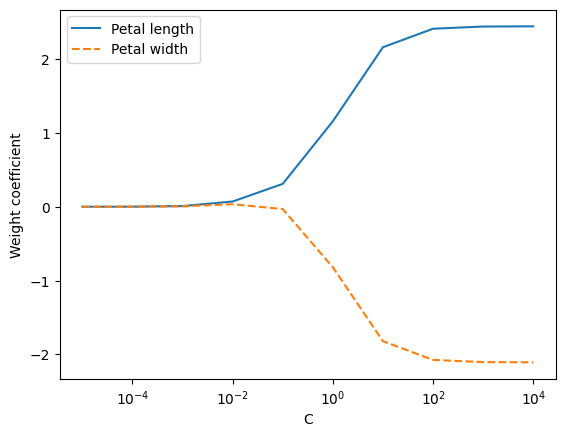

In [25]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_08.png', dpi=600)
plt.show()

#### 基于SVM的最大间隔分类

支持向量机(Support vector machine, SVM)可以被视为感知器的扩展。在后者中，优化目标是最大化间隔(margin)。如下图所示，最靠近超平面的训练样本，被称为“支持向量(support vectors)”。

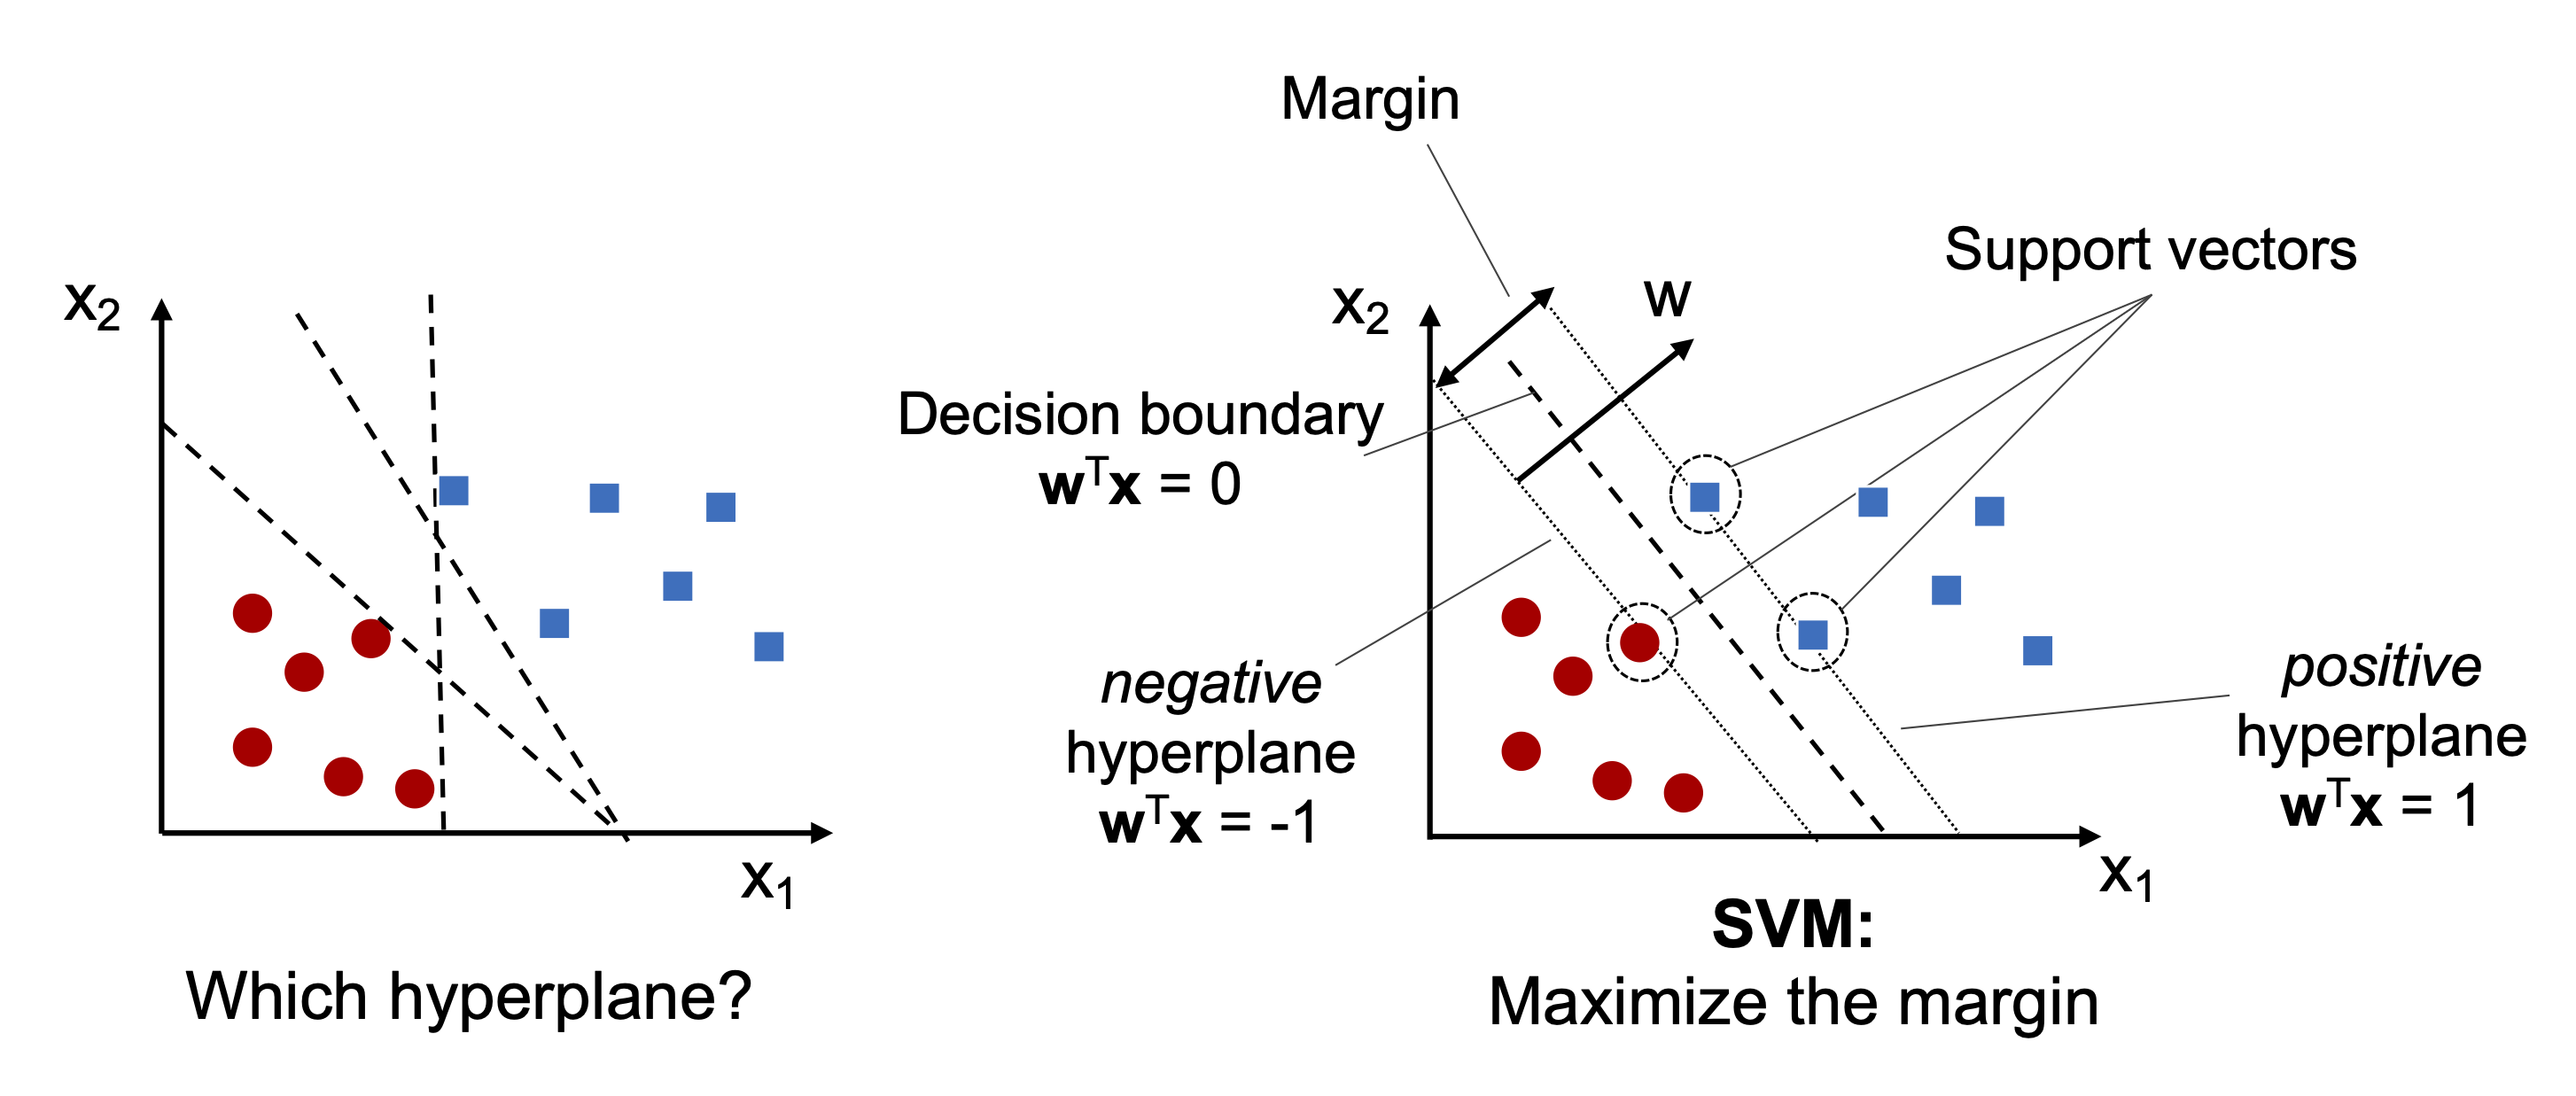

In [26]:
Image(filename="../Python-MachineLearning/Attached_images/Chapter3/figures/03_09.png", 
      width=450)

####  使用松弛变量(slack variables)来处理非线性可分问题

松弛变量由Vladimir Vapnik于1995年提出，并进一步产生了所谓的软间隔分类(soft-margin classification)。其引入的动机是，对于非线性可分数据，需要对SVM优化目标中的线性约束进行一定的放宽，以便于在存在错误分类的情况下，实现优化的收敛。

在SVM上下文中，使用松弛变量而引入的C被视为控制错误分类惩罚的超参数。

* 其中，当 C 值较小时，模型对误分类的惩罚较小，这可能导致更多的数据点违反间隔约束，从而增加模型的复杂度和过拟合的风险。

* 当 C 值较大时，模型对误分类的惩罚较大，这会使得模型更加倾向于找到一个没有违反间隔约束的解，即使这意味着模型可能无法完美地拟合所有数据点。这种情况下，模型倾向于找到一个更简单的解，从而减少过拟合的风险。

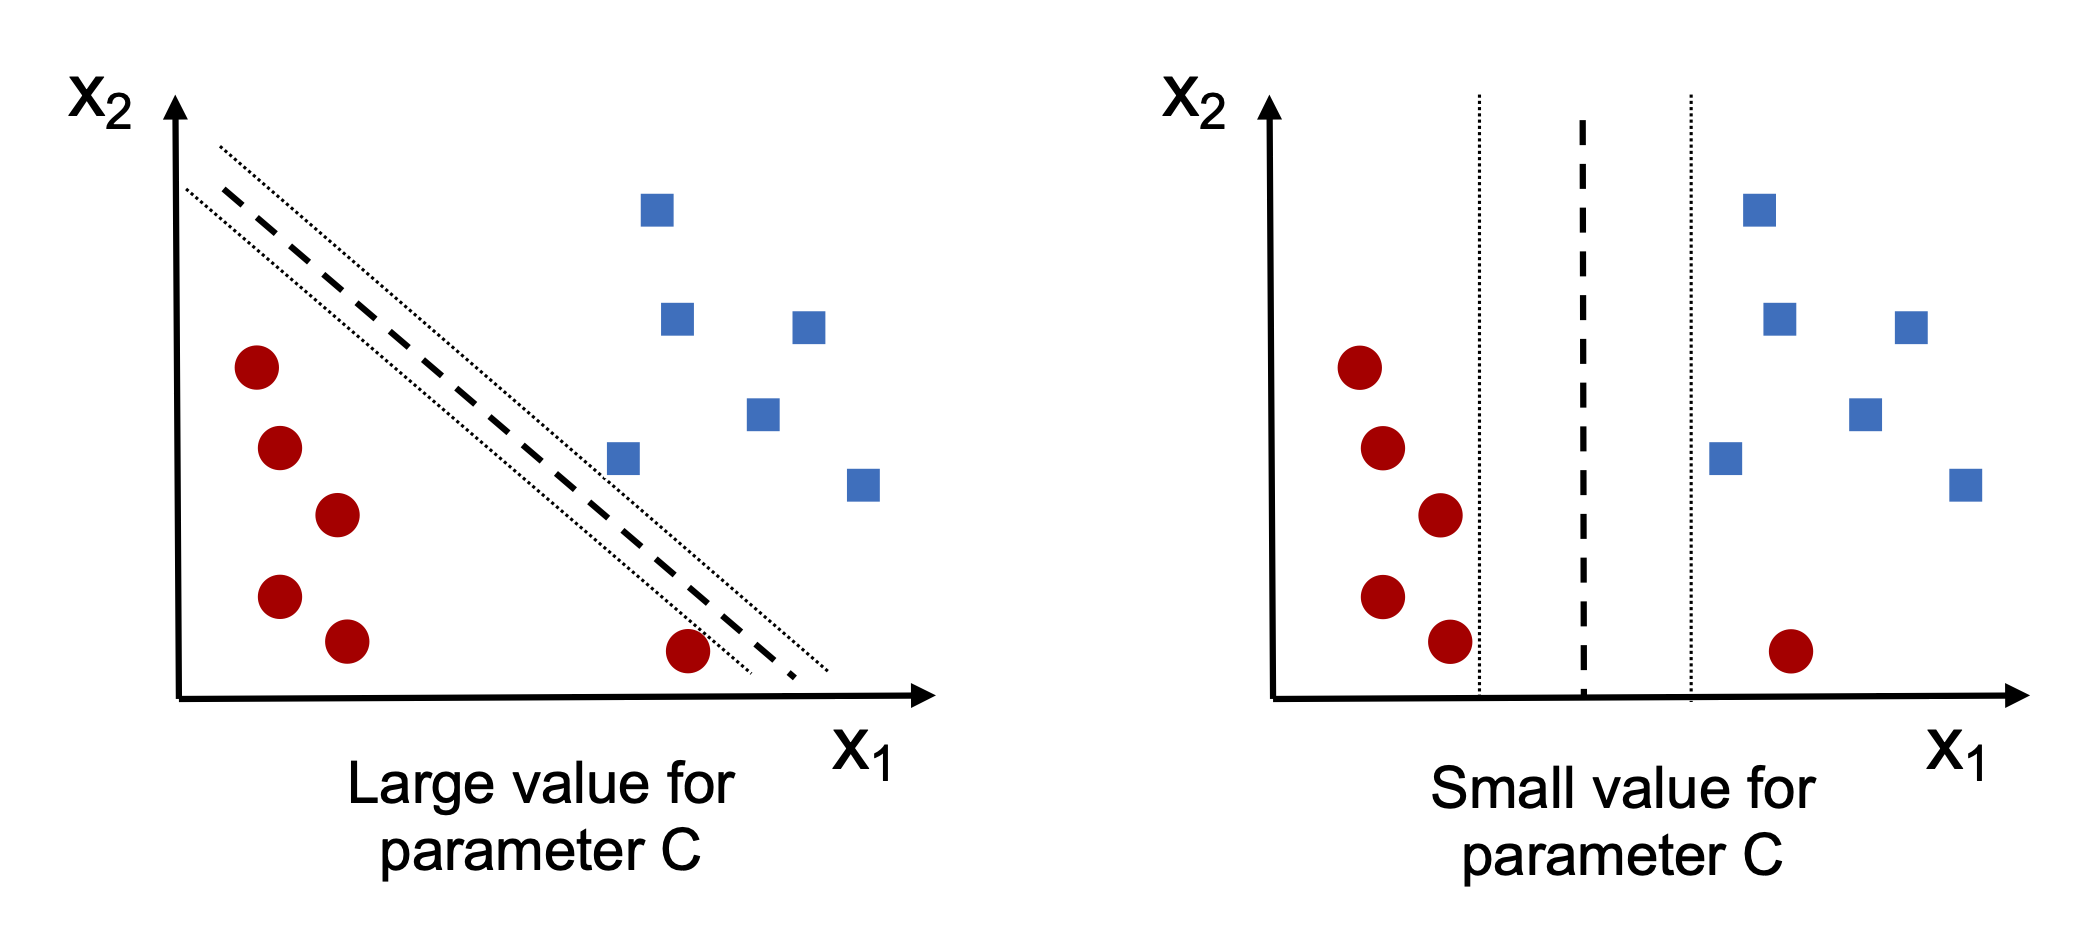

In [27]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter3/figures/03_10.png', 
      width=450)

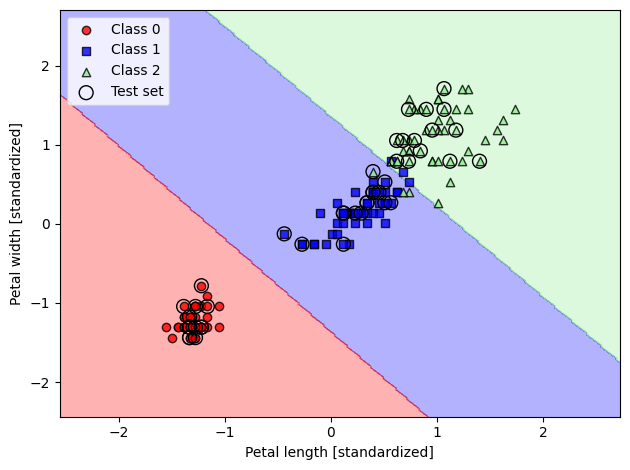

In [28]:
# 使用sklearn训练一个SVM分类器.
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=svm, 
                      test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_11.png', dpi=600)
plt.show()

在实际分类任务中，线性SVM和线性逻辑回归通常会产生类似结果。其中，逻辑回归试图最大化训练数据的条件似然，这使得它比SVM更容易出现异常值。另一方面，逻辑回归的优势在于模型简单，容易实现，而且可以轻松更新，在处理streaming data的时候具有吸引力。

#### 在sklearn中的可选实现方法

与原生Python实现相比，可以通过设置solver='liglinear'来使用LINLINEAR，后者是台湾大学利用C/C++开发的经过高度优化的解决方案。他们允许对大量线性分类器进行快速训练，类似的还有LIBSVM。

然而，有时候数据集太大，无法装入计算机内存。因此sklearn通过SGDClassifier提供了替代实现，该类还通过partial_fit方法支持在线学习。

In [29]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

#### 使用核SVM解决非线性问题

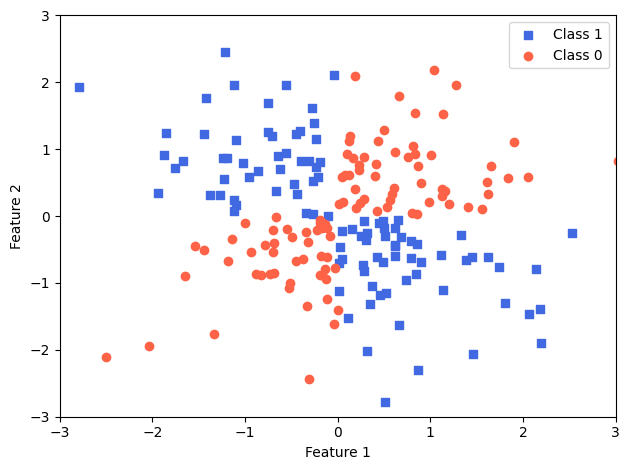

In [30]:
# 一个非线性可分的数据集示例.
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, 
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_12.png', dpi=450)
plt.show()

所以根据上图结果，无法使用线性超平面作为决策边界。处理这种线性不可分数据的**核方法(kernel methods)**背后的基本思想是创建原始特征的非线性组合，通过映射函数$\phi$将他们映射到高维空间, 如下图所示：
$$\phi(x_1,x_2)=(z_1,z_2,z_3)=(x_1,x_2,x_1^2+x_2^2)$$

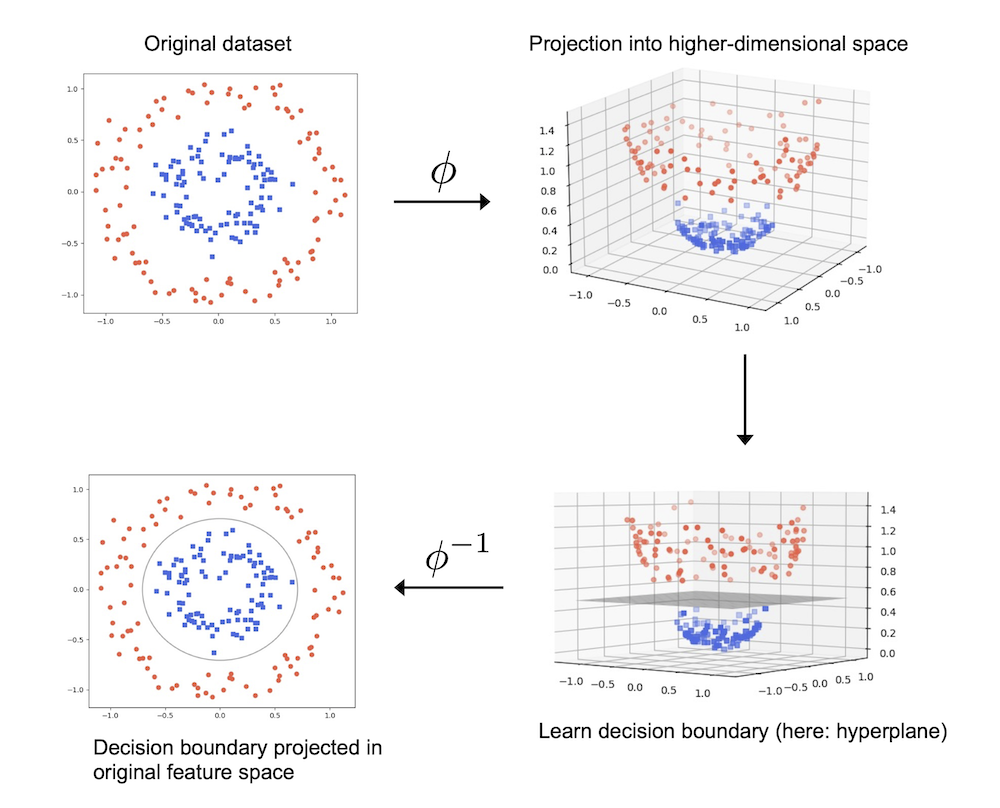

In [31]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter3/figures/03_13.png', 
      width=450)

#### 使用核技巧在高维空间中寻找分隔超平面(separating hyperplanes)

如上所述，可以通过使用映射函数实现到高维空间的映射。然而，这种方法的问题在于计算成本非常高。这就是**kernel trick**的用武之地。

此时，我们需要将点积dot product $\boldsymbol{x}^{(i)T}\boldsymbol{x}^{(j)}$使用 $\phi(\boldsymbol{x}^{(i)})^T\phi(\boldsymbol{x}^{(j)})$替换，于是定义得到核函数如下：
$$\kappa\big(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)}\big)=\phi\big(\boldsymbol{x}^{(i)}\big)^T\phi\big(\boldsymbol{x}^{(j)}\big)$$

通常，最常用的核函数是**Radial basis function(RBF)**, 也被简称为高斯核：
$$\kappa\big(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)}\big)=\exp\left(-\frac{\left\|\boldsymbol{x}^{(i)}-\boldsymbol{x}^{(j)}\right\|^2}{2\sigma^2}\right)$$
上式也可以简写为：
$$\kappa\big(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)}\big)=\exp\big(-\gamma\big\Vert \boldsymbol{x}^{(i)}-\boldsymbol{x}^{(j)}\big\Vert^2\big)$$

此时，$\gamma=\frac{1}{2\sigma^{2}}$是需要优化的自由参数，**粗略来说，Kernel可以解释为一对示例之间的相似性函数**。

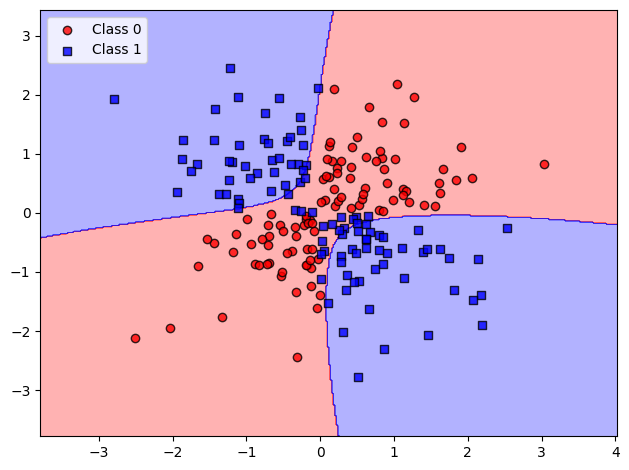

In [32]:
# 训练一个‘rbf’核的SVM.
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_14.png', dpi=600)
plt.show()

#### 决策树

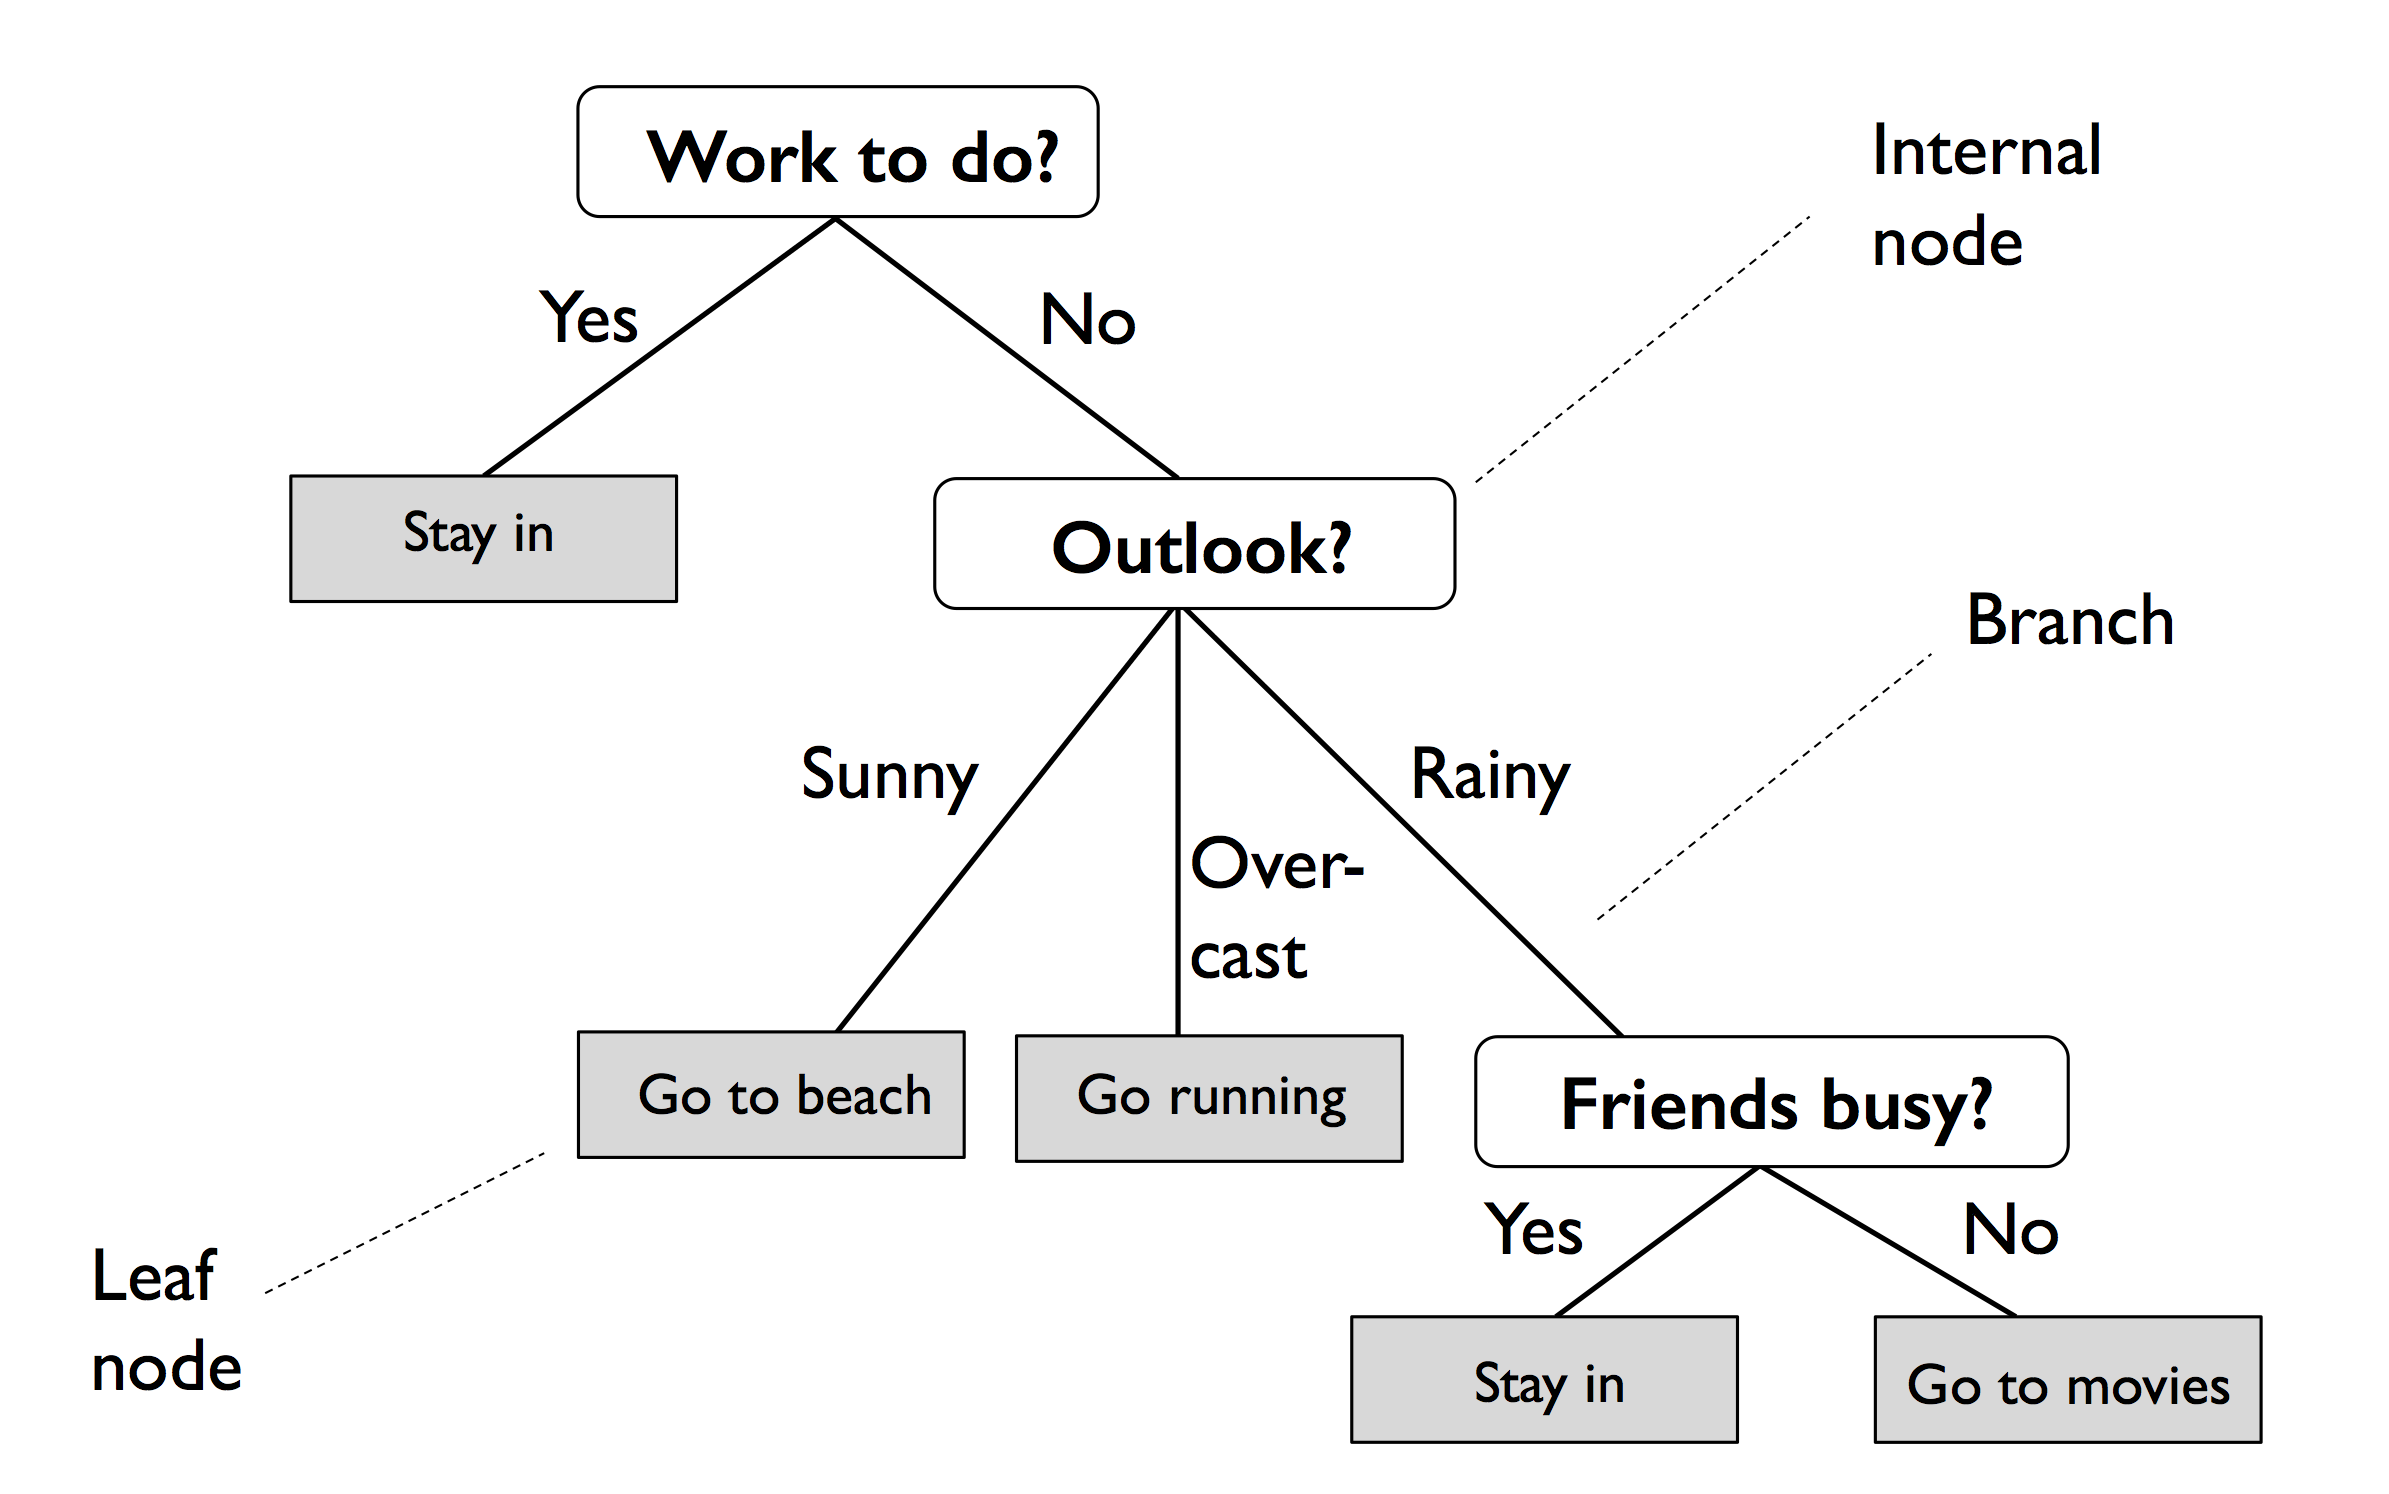

In [33]:
# 决定一天的活动为例.
Image(filename='../Python-MachineLearning/Attached_images/Chapter3/figures/03_17.png', 
      width=450)

决策树学习的关键是选择最优划分属性，整体上我们希望决策树的分支结点所包含的样本尽可能属于同一类别，即结点的“纯度(purity)”越来越高。在这里定义一个目标函数IG(Information gain):
$$IG\big(D_p,f\big)=I\big(D_p\big)-\sum_{j=1}^m\frac{N_j}{N_p}I\big(D_j\big)$$

其中，$f$是即将执行分裂的特征；$D_p$和$D_j$分别是父节点和第$j$个子节点的数据集；$I$是不纯对指标，即熵。
同时考虑到不同分支所包含的样本数不同，因此$\frac{N_j}{N_p}$实际上是一个权重，即样本数越多的分支结点影响越大。

在sklearn等库中，仅实现了二叉决策树，这意味着每个父结点仅分裂成左右两个子节点$D_{left}$和$D_{right}$:
$$IG\big(D_p,f\big)=I\big(D_p\big)-\frac{N_{left}}{N_p}I\big(D_{left}\big)-\frac{N_{right}}{N_p}I\big(D_{right}\big)$$

在上式中，对于非空类别$(p(i|t)\neq0)$, 信息熵$I_{H}$的定义如下：
$$I_H(t)=-\sum_{i=1}^cp(i|t)\log_2p(i|t)$$

其中，$p(i|t)$是对于一个结点中样本属于类别$i$的比例。

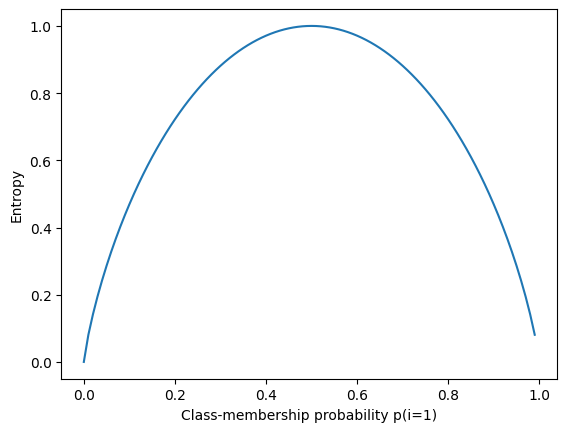

In [36]:
# 不同分布对应的信息熵.
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
"""
    计算信息熵的时候约定, 如果P==0, 则plogp=0;
"""
ent = [entropy(p) if p !=0 else 0 for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
# plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_26.png', dpi=600)
plt.show()

### 基尼不纯度(Gini impurity， $I_G$)

基尼不纯度可以理解为最小化错误分类概率的标准：
$$I_G(t)=\sum_{i=1}^cp(i|t)\left(1-p(i|t)\right)=1-\sum_{i=1}^cp(i|t)^2$$

与信息熵类$I_H$似，基尼不纯度在类别完全混合的时候最大，例如在二元类别设置中$(C=2)$：
$$I_G(t)=1-\sum_{i=1}^c0.5^2=0.5$$

### 分类误差(classification error)

定义如下：
$$I_E(t)=1-\max\{p(i|t)\}$$

分类误差$I_E$是剪枝(pruning)的一个有用标准，但是**对结点的类别概率变化不敏感**, 如下图：[Figure 3.20](../Python-MachineLearning/Attached_images/Chapter3/figures/03_18.png)

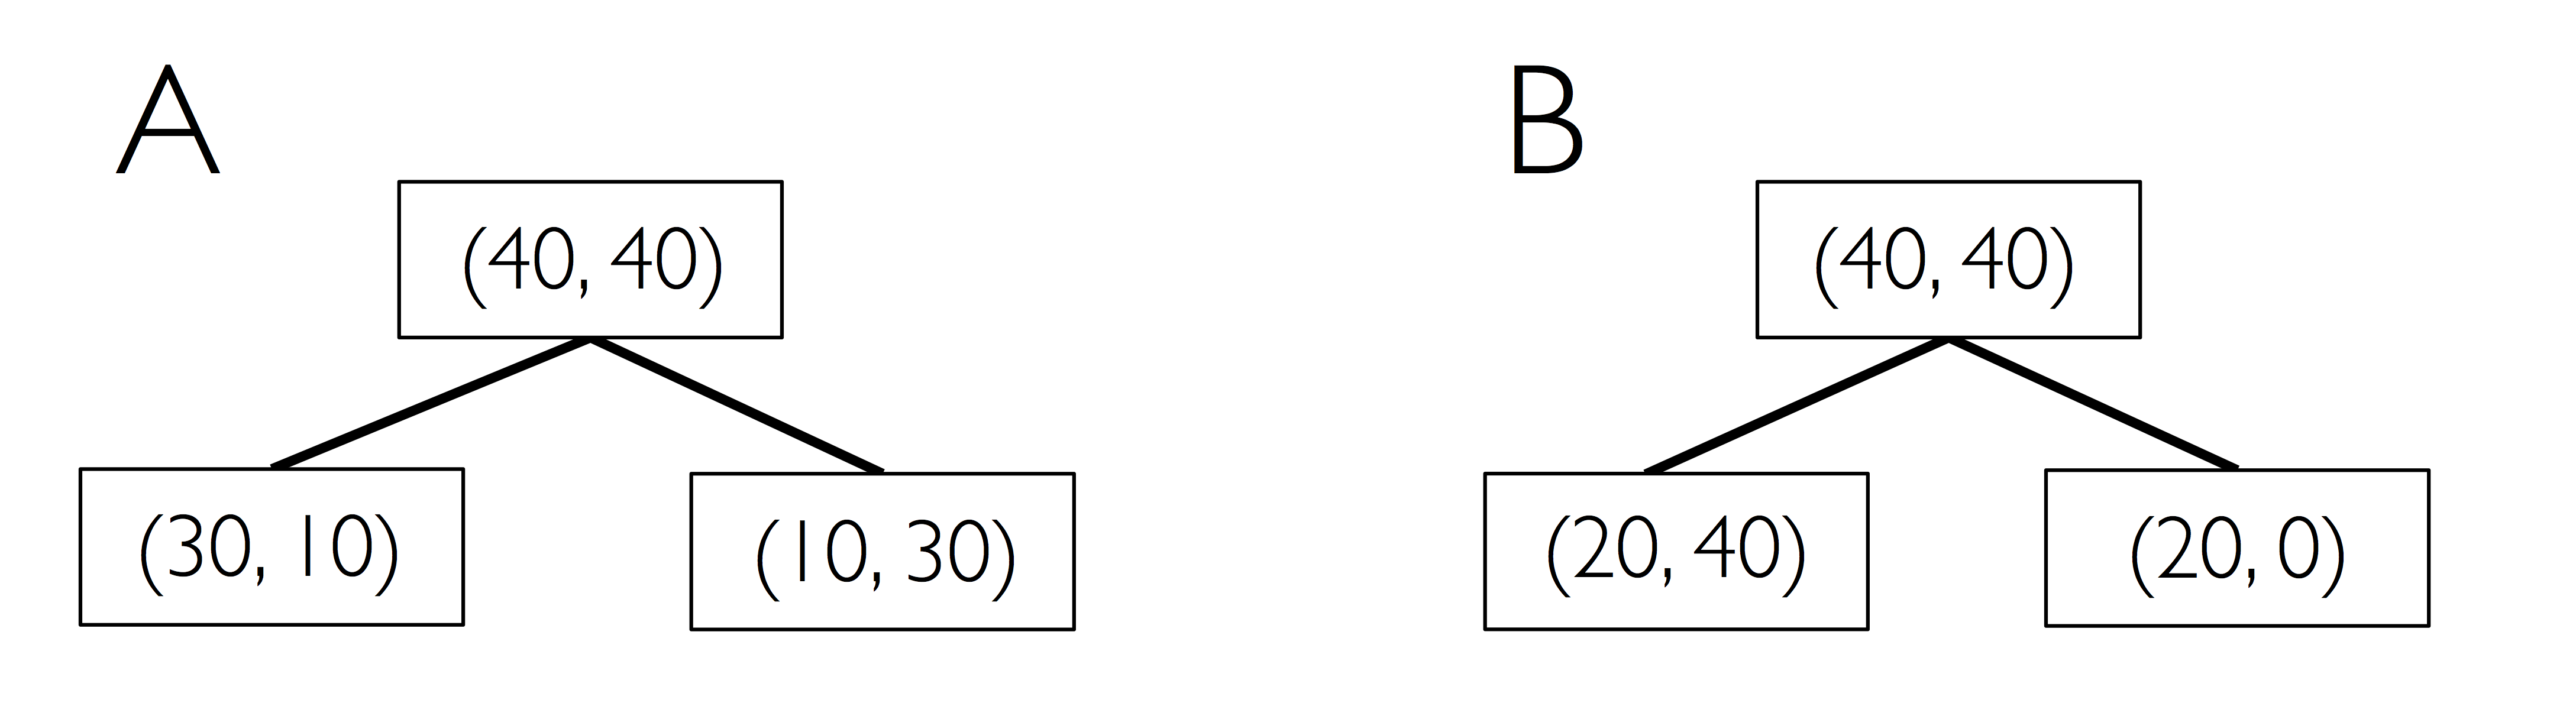

In [37]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter3/figures/03_18.png', 
      width=450)

对于上图，分别计算分类误差、基尼不纯度、熵标准三种不纯度指标：

**Classification error:**
$$\begin{aligned}
&I_{E}\big(D_{p}\big)=1-0.5=0.5 \\
&\text{A:}\quad I_{E}\big(D_{left}\big)=1-\frac{3}{4}=0.25 \\
&\text{A:}\quad I_E(D_{right})=1-\frac{3}{4}=0.25 \\
&\text{A:}\quad IG_{E}=0.5-\frac{4}{8}0.25-\frac{4}{8}0.25=0.25 \\
&\text{B:}\quad I_{E}\big(D_{left}\big)=1-\frac{4}{6}=\frac{1}{3} \\
&\text{B:}\quad I_{E}\big(D_{right}\big)=1-1=0 \\
&\text{B:}\quad IG_{E}=0.5-\frac{6}{8}\times\frac{1}{3}-0=0.25 
\end{aligned}$$


**Gini impurity:**
$$\begin{aligned}
&I_{G}\big(D_{p}\big)=1-(0.5^{2}+0.5^{2})=0.5 \\
&\text{A} \colon\quad I_{G}\big(D_{left}\big)=1-\left(\left(\frac{3}{4}\right)^{2}+\left(\frac{1}{4}\right)^{2}\right)=\frac{3}{8}=0.375 \\
&\text{A} \colon\quad I_{G}\big(D_{right}\big)=1-\left(\left(\frac{1}{4}\right)^{2}+\left(\frac{3}{4}\right)^{2}\right)=\frac{3}{8}=0.375 \\
&\text{A} \colon\quad IG_{G}=0.5-\frac480.375-\frac480.375=0.125 \\
&\text{B} \colon\quad I_{G}\big(D_{left}\big)=1-\left(\left(\frac{2}{6}\right)^{2}+\left(\frac{4}{6}\right)^{2}\right)=\frac{4}{9}=0. \overline{4} \\
&\text{B} \colon\quad I_G(D_{right})=1-(1^2+0^2)=0 \\
&\text{B} \colon\quad IG_G=0.5-\frac{6}{8}0.\overline{4}-0=0.1\overline{6} 
\end{aligned}$$


**Entropy criterion:**
$$\begin{aligned}&I_{H}(D_{p})=-(0.5\log_{2}(0.5)+0.5\log_{2}(0.5))=1\\&A{:}\quad I_{H}(D_{left})=-\left(\frac{3}{4}\mathrm{log}_{2}\left(\frac{3}{4}\right)+\frac{1}{4}\mathrm{log}_{2}\left(\frac{1}{4}\right)\right)=0.81\\&A{:}\quad I_{H}(D_{right})=-\left(\frac{1}{4}\mathrm{log}_{2}\left(\frac{1}{4}\right)+\frac{3}{4}\mathrm{log}_{2}\left(\frac{3}{4}\right)\right)=0.81\\&A{:}\quad IG_{H}=1-\frac{4}{8}0.81-\frac{4}{8}0.81=0.19\\&B{:}\quad I_{H}(D_{left})=-\left(\frac{2}{6}\mathrm{log}_{2}\left(\frac{2}{6}\right)+\frac{4}{6}\mathrm{log}_{2}\left(\frac{4}{6}\right)\right)=0.92\\&B{:}\quad I_{H}(D_{right})=0\\&B{:}\quad IG_{H}=1-\frac{6}{8}0.92-0=0.31\end{aligned}$$


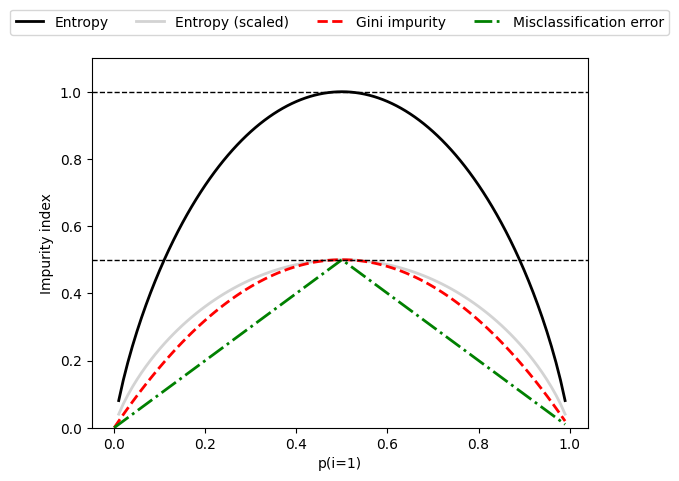

In [38]:
"""
为了更直观地比较之前讨论过的三种不同的不纯度标准, 绘制第1类概率范围 [0, 1] 的不纯度指数。
此外，还将添加熵的缩放版本(熵 / 2), 以观察基尼不纯度是熵和分类误差之间的中间度量。代码如下：
"""
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
#plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_19.png', dpi=600, bbox_inches='tight')
plt.show()

### 使用sklearn构建决策树

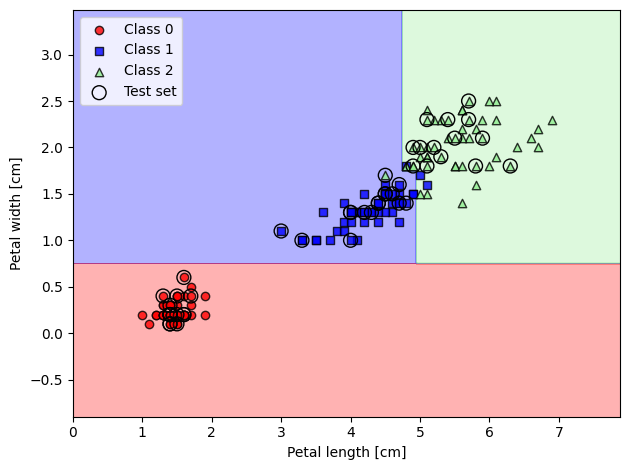

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_20.png', dpi=600)
plt.show()

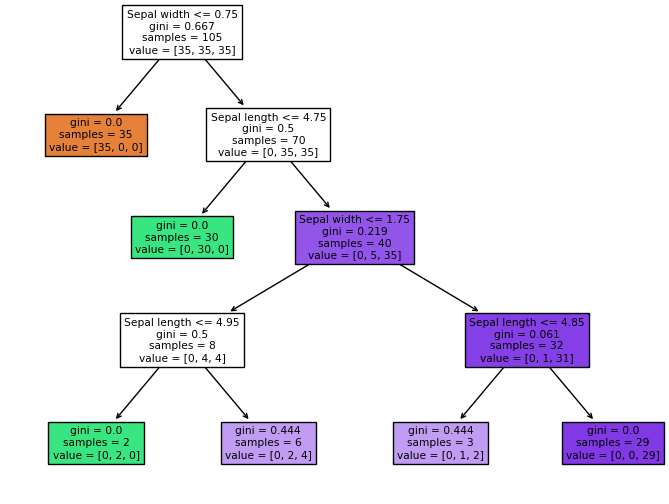

In [40]:
# 决策树可视化.
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']

tree.plot_tree(tree_model, 
               feature_names=feature_names, 
               filled=True)
plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_21_1.pdf')
plt.show()

#### 随机森林

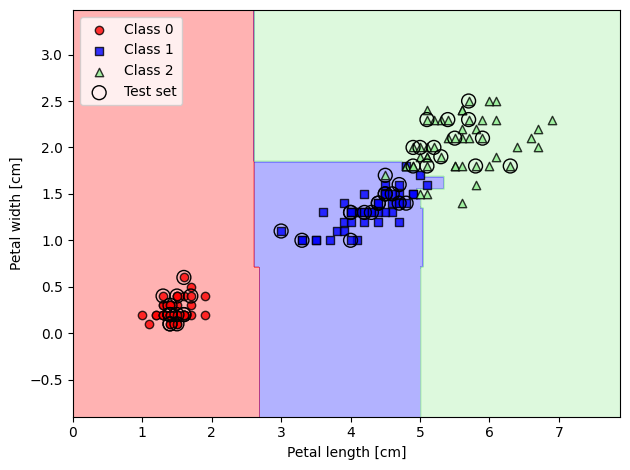

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, 
                                random_state=1, 
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_2.png', dpi=600)
plt.show()

#### K-nearest neighbors-a lazy learning algorithm

**KNN是懒学习器的典型例子, 其原因在于它不会从训练数据中学习判别函数， 而是记住训练集数据。**

**参数化和非参数化模型(Parametric versus non-parametric models)**

使用参数模型，从训练数据集估计参数，以学习可以对新数据点进行分类的函数，而不再需要原始训练数据集。参数模型的典型示例是感知器、逻辑回归和线性支持机。相比之下，非参数模型不能用固定的参数集来描述，并且参数的数量会随着训练数据量的变化而变化。到目前为止，我们已经看到的非参数模型的两个例子是决策树分类器/随机森林和核（但不是线性）支持机。

KNN属于被描述为基于实例学习(instance-based learning)的非参数模型的子类别。基于实例学习的模型的特点是记忆训练数据集，而懒惰学习是基于实例学习的一种特例，在学习过程中没有（零）成本。

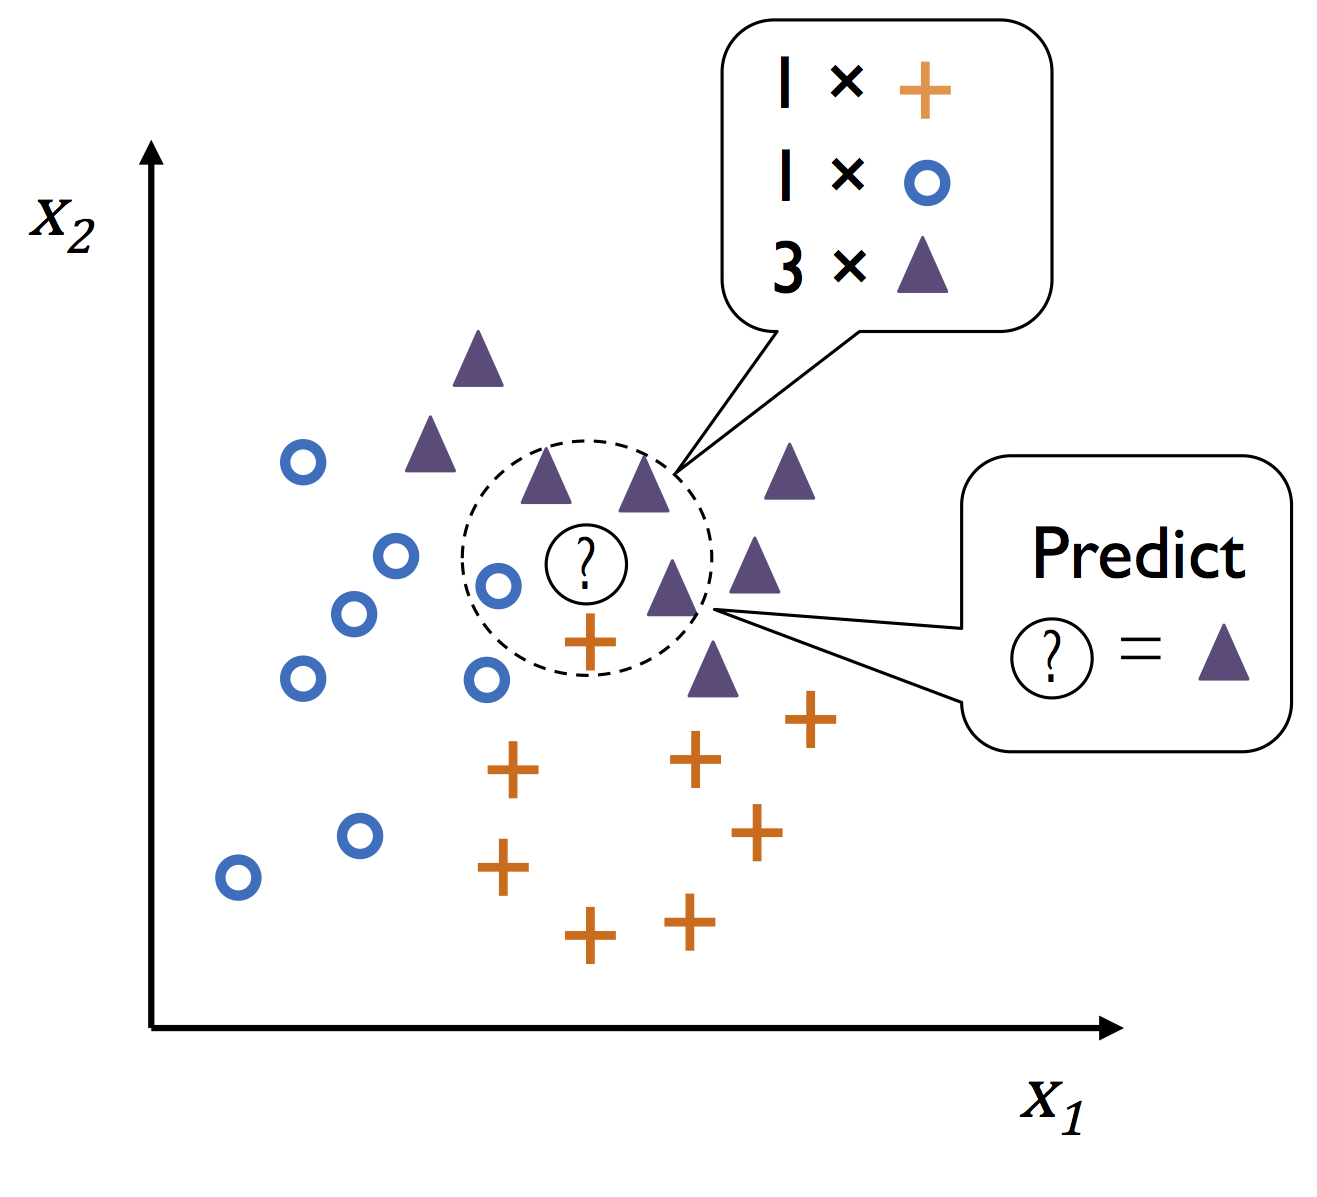

In [42]:
# KNN学习算法决策过程.
Image(filename='../Python-MachineLearning/Attached_images/Chapter3/figures/03_23.png', 
      width=450)

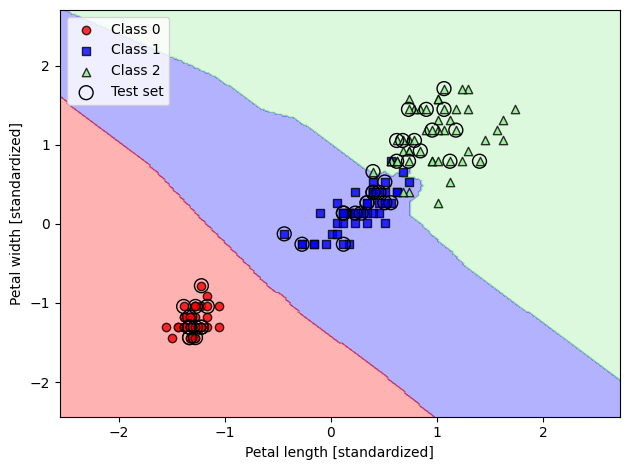

In [43]:
# 使用sklearn实现KNN.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_24_figures.png', dpi=600)
plt.show()

在上述代码中，使用的是闵可夫斯基距离，其作为欧式距离的泛化，定义如下：
$$d\big(\boldsymbol x^{(i)},\boldsymbol  x^{(j)}\big)=\sqrt{\sum_k\bigl|x_k^{(i)}-x_k^{(j)}\bigr|^p}$$

[sklearn中关于距离的度量.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html)

值得一提的是，由于维度灾难(curse of dimensionality)， KNN很容易出现过拟合。其中，维数灾难是指：对于固定大小的训练数据集，随着维数的增加，特征空间变得越来越稀疏。

在逻辑回归中，可以通过正则化来避免过拟合；在决策树和KNN中，我们可以选择使用特征选择和降维技术来避免维数灾难。